<a href="https://colab.research.google.com/github/Raseealmanea/2025_GP_19/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
RAW_DIR = "/content/drive/MyDrive/mimic-iv-2.2"


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [13]:
for root, dirs, files in os.walk(RAW_DIR):
    print(root)
    for f in files:
        print("  -", f)


/content/drive/MyDrive/mimic-iv-2.2
  - CHANGELOG.txt
  - LICENSE.txt
  - SHA256SUMS.txt
/content/drive/MyDrive/mimic-iv-2.2/hosp
  - hcpcsevents.csv.gz
  - d_hcpcs.csv.gz
  - omr.csv.gz
  - patients.csv.gz
  - d_icd_diagnoses.csv.gz
  - d_icd_procedures.csv.gz
  - microbiologyevents.csv.gz
  - d_labitems.csv.gz
  - drgcodes.csv.gz
  - diagnoses_icd.csv.gz
  - admissions.csv.gz
  - procedures_icd.csv.gz
  - transfers.csv.gz
  - pharmacy.csv.gz
  - prescriptions.csv.gz
  - services.csv.gz
  - provider.csv.gz
  - emar_detail.csv.gz
  - emar.csv.gz
  - poe_detail.csv.gz
  - poe.csv.gz
  - labevents.csv.gz
/content/drive/MyDrive/mimic-iv-2.2/icu
  - caregiver.csv.gz
  - icustays.csv.gz
  - procedureevents.csv.gz
  - inputevents.csv.gz
  - ingredientevents.csv.gz
  - outputevents.csv.gz
  - datetimeevents.csv.gz
  - chartevents.csv.gz
  - d_items.csv.gz


In [14]:
diag = pd.read_csv(f"{RAW_DIR}/hosp/diagnoses_icd.csv.gz")


In [15]:
adm = pd.read_csv(f"{RAW_DIR}/hosp/admissions.csv.gz")


In [16]:
patients = pd.read_csv(f"{RAW_DIR}/hosp/patients.csv.gz")


# Basic dataset overview

In [17]:
print(diag.shape)
diag.head()

print(diag.info())

diag.describe(include='all')


(4756326, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756326 entries, 0 to 4756325
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   subject_id   int64 
 1   hadm_id      int64 
 2   seq_num      int64 
 3   icd_code     object
 4   icd_version  int64 
dtypes: int64(4), object(1)
memory usage: 181.4+ MB
None


,subject_id,hadm_id,seq_num,icd_code,icd_version
count,4.756326e+06,4.756326e+06,4.756326e+06,4756326,4.756326e+06
unique,NaN,NaN,NaN,25809,NaN
top,NaN,NaN,NaN,4019,NaN
freq,NaN,NaN,NaN,97361,NaN
mean,1.499966e+07,2.500011e+07,8.421183e+00,NaN,9.418274e+00
std,2.878717e+06,2.888907e+06,6.555925e+00,NaN,4.932757e-01
min,1.000003e+07,2.000002e+07,1.000000e+00,NaN,9.000000e+00
25%,1.249952e+07,2.249706e+07,3.000000e+00,NaN,9.000000e+00
50%,1.499724e+07,2.500188e+07,7.000000e+00,NaN,9.000000e+00
75%,1.749634e+07,2.750289e+07,1.200000e+01,NaN,1.000000e+01


# Check missing values

In [18]:
diag.isnull().mean().sort_values(ascending=False).head(20)


,0
subject_id,0.0
hadm_id,0.0
seq_num,0.0
icd_code,0.0
icd_version,0.0


# Count unique ICD codes

In [19]:
diag["icd_code"].nunique()


25809

# Distribution of ICD code versions

In [20]:
diag["icd_version"].value_counts()


,count
icd_version,
9,2766877
10,1989449


Top ICD codes

In [21]:
diag["icd_code"].value_counts().head(20)


,count
icd_code,
4019,97361
2724,63875
I10,51706
E785,48581
53081,46238
25000,41029
Z87891,38893
42731,35180
311,34632


# Explore patient demographics

In [22]:
patients.describe(include='all')


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
count,2.997120e+05,299712,299712.000000,299712.000000,299712,29076
unique,NaN,2,NaN,NaN,5,19041
top,NaN,F,NaN,NaN,2008 - 2010,2151-07-30
freq,NaN,158553,NaN,NaN,96695,7
mean,1.500885e+07,NaN,48.539888,2151.124056,NaN,NaN
std,2.885019e+06,NaN,20.895650,23.464598,NaN,NaN
min,1.000003e+07,NaN,18.000000,2110.000000,NaN,NaN
25%,1.250796e+07,NaN,29.000000,2131.000000,NaN,NaN
50%,1.501416e+07,NaN,48.000000,2151.000000,NaN,NaN
75%,1.750489e+07,NaN,65.000000,2171.000000,NaN,NaN


Age distribution

Text(0, 0.5, 'Count')

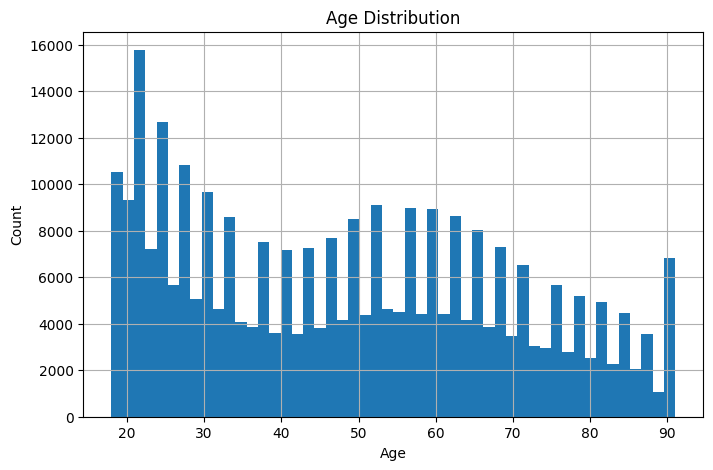

In [23]:
patients['anchor_age'].hist(bins=50, figsize=(8,5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")


Gender counts

Text(0, 0.5, 'Count')

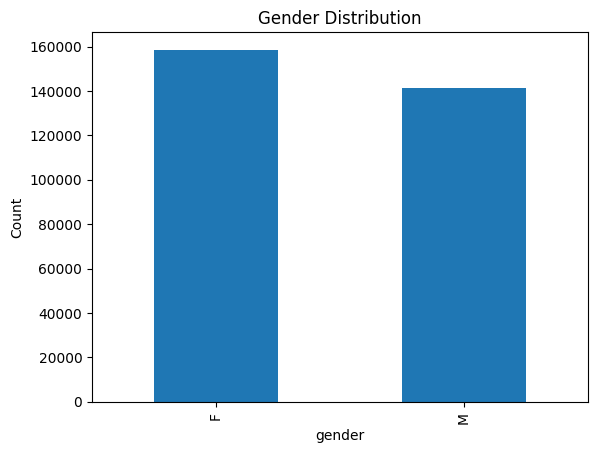

In [24]:
patients['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.ylabel("Count")


### Explore admissions

Admission locations

In [25]:
adm['admission_location'].value_counts().head(10)


,count
admission_location,
EMERGENCY ROOM,232595
PHYSICIAN REFERRAL,114963
TRANSFER FROM HOSPITAL,35974
WALK-IN/SELF REFERRAL,15816
CLINIC REFERRAL,10008
PROCEDURE SITE,7804
PACU,5479
INTERNAL TRANSFER TO OR FROM PSYCH,4205
TRANSFER FROM SKILLED NURSING FACILITY,3843


Length of stay

Text(0, 0.5, 'Count')

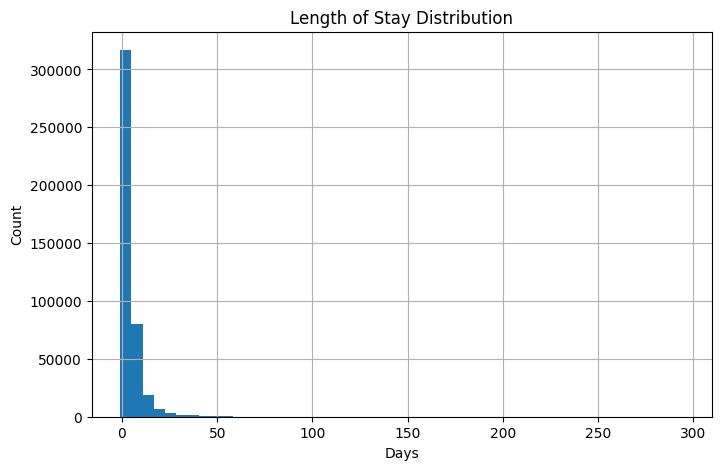

In [26]:
adm['los'] = (pd.to_datetime(adm['dischtime']) - pd.to_datetime(adm['admittime'])).dt.days

adm['los'].hist(bins=50, figsize=(8,5))
plt.title("Length of Stay Distribution")
plt.xlabel("Days")
plt.ylabel("Count")


# Joining tables for richer EDA
link diagnoses → admissions → patients:

In [27]:
merged = diag.merge(adm, on=['subject_id', 'hadm_id'], how='left')
merged = merged.merge(patients, on=['subject_id'], how='left')


# Analyze diagnoses by patient demographics

ICD codes by gender

In [28]:
merged.groupby('gender')['icd_code'].nunique()


,icd_code
gender,
F,21024
M,20364


Most frequent ICD codes by age groups

In [29]:
merged['age_group'] = pd.cut(
    merged['anchor_age'],
    bins=[0, 18, 40, 60, 80, 120],
    labels=['0-18', '18-40', '40-60', '60-80', '80+']
)

merged.groupby('age_group')['icd_code'].count()


/tmp/ipython-input-2632238001.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby('age_group')['icd_code'].count()


,icd_code
age_group,
0-18,8062
18-40,652276
40-60,1452466
60-80,1910754
80+,732768


Saving EDA summary outputs

In [30]:
merged.describe(include='all').to_csv("mimiciv_summary.csv")
